In [1]:
# !pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot


import re
import string
from textblob import TextBlob
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# **Loading Dataset1**

In [3]:
df = pd.read_csv('./data/train_data.csv')
df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.shape

(109248, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   id                                            109248 non-null  object
 1   teacher_id                                    109248 non-null  object
 2   teacher_prefix                                109245 non-null  object
 3   school_state                                  109248 non-null  object
 4   project_submitted_datetime                    109248 non-null  object
 5   project_grade_category                        109248 non-null  object
 6   project_subject_categories                    109248 non-null  object
 7   project_subject_subcategories                 109248 non-null  object
 8   project_title                                 109248 non-null  object
 9   project_essay_1                               109248 non-nu

In [7]:
df.isna().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [8]:
df.dropna(subset=['teacher_prefix'], axis=0, inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='O')

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary
count,109245,109245,109245,109245,109245,109245,109245,109245,109245,109245,109245,3757,3757,109245
unique,109245,72165,5,51,108534,4,51,401,100850,94316,108829,3754,3749,108321
top,p253737,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,2016-09-01 00:00:03,Grades PreK-2,Literacy & Language,Literacy,Flexible Seating,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,"Daily, students will check out their chrome bo...",Each year our students struggle to make adequa...,My students need electronic tablets to do all ...
freq,1,44,57269,15387,18,44225,23654,9486,234,32,15,2,2,48


In [11]:
df.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,109245.000000,109245.000000
mean,11.153462,0.848579
std,27.777477,0.358461
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


# **Loading Dataset2**

In [12]:
df_res = pd.read_csv('./data/resources.csv')
df_res.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [13]:
df_res.shape

(1541272, 4)

In [14]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [15]:
df_res.isna().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

In [16]:
# df_res.duplicated().sum()

In [17]:
# df_res.drop_duplicates(inplace=True)

In [18]:
df_res.describe()

,quantity,price
count,1.541272e+06,1.541272e+06
mean,2.860509e+00,5.028398e+01
std,7.570345e+00,1.447326e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.900000e+00
50%,1.000000e+00,1.499000e+01
75%,2.000000e+00,3.980000e+01
max,8.000000e+02,9.999000e+03


In [19]:
df_res.describe(include='O')

,id,description
count,1541272,1540980
unique,260115,332928
top,p009778,Apple - iPad� mini 2 with Wi-Fi - 16GB - Space...
freq,100,3037


# **EDA**

In [20]:
df_eda1 = df.copy()
df_eda1['project_submitted_datetime'] = pd.to_datetime(df_eda1['project_submitted_datetime'])
df_eda1.head(3)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


## **Target Feature**

In [110]:
df_eda1['project_is_approved'].value_counts()

1    92703
0    16542
Name: project_is_approved, dtype: int64

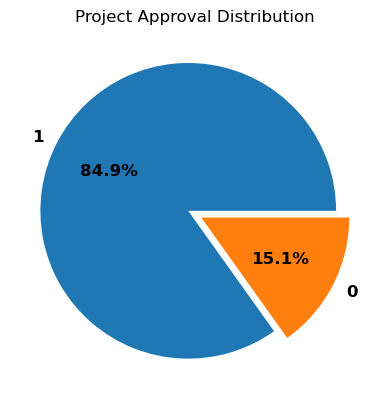

In [109]:
plt.pie(df_eda1['project_is_approved'].value_counts(), labels = df_eda1['project_is_approved'].value_counts().index, 
        explode = (0.05, )*len(df_eda1['project_is_approved'].value_counts()), 
        autopct='%.1f%%', textprops = {'fontweight': 'bold', 'fontsize': 12})
plt.title(f'Project Approval Distribution', fontsize=12)
plt.show()

## **Temporal Features**
- 'project_submitted_datetime'

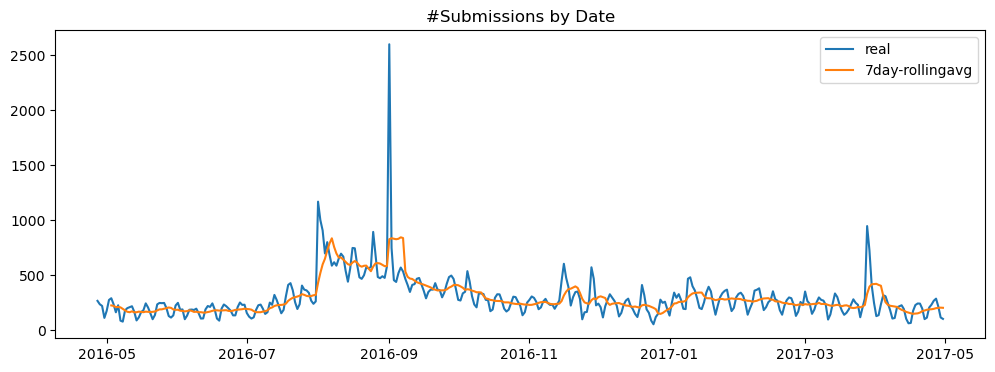

In [129]:
df_eda1['dos'] = df_eda1['project_submitted_datetime'].dt.date

plt.figure(figsize=(12, 4))
plt.plot(df_eda1.groupby('dos')['project_is_approved'].count(), label='real')
plt.plot(df_eda1.groupby('dos')['project_is_approved'].count().rolling(7).mean(), label='7day-rollingavg')
plt.legend()
plt.title('#Submissions by Date')
plt.show()

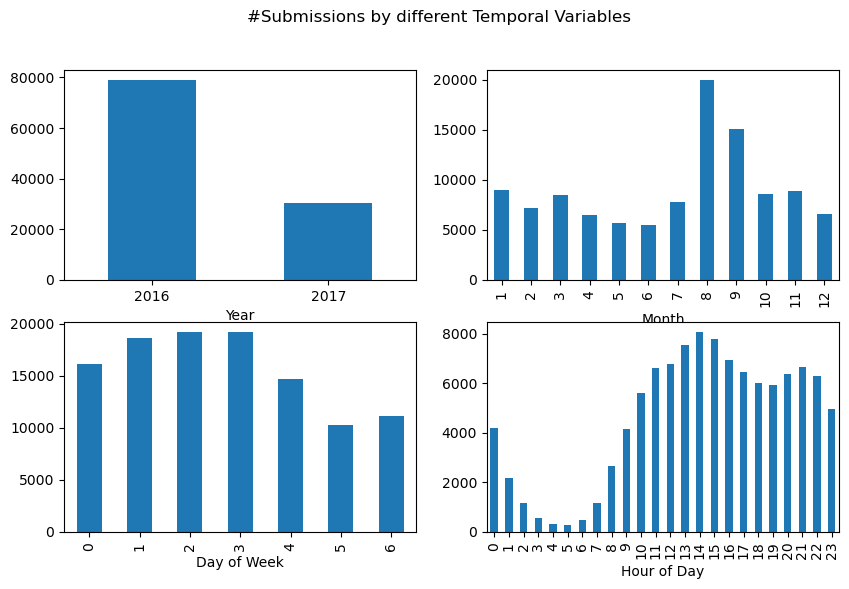

In [128]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
df_eda1['project_submitted_datetime'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Year')

plt.subplot(2, 2, 2)
df_eda1['project_submitted_datetime'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')

plt.subplot(2, 2, 3)
df_eda1['project_submitted_datetime'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of Week')

plt.subplot(2, 2, 4)
df_eda1['project_submitted_datetime'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of Day')

plt.suptitle('#Submissions by different Temporal Variables')
plt.show()

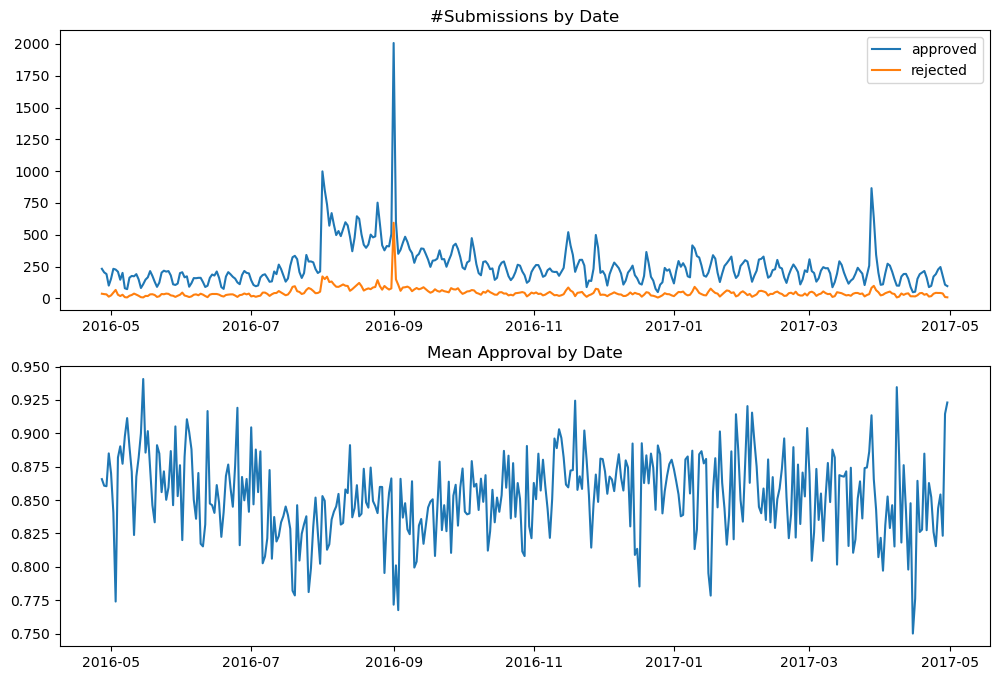

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df_eda1.loc[df_eda1['project_is_approved']==1].groupby('dos')['project_is_approved'].count(), label='approved')
plt.plot(df_eda1.loc[df_eda1['project_is_approved']==0].groupby('dos')['project_is_approved'].count(), label='rejected')
plt.legend()
plt.title('#Submissions by Date')

plt.subplot(2, 1, 2)
plt.plot(df_eda1.groupby('dos')['project_is_approved'].mean())
plt.title('Mean Approval by Date')


plt.show()

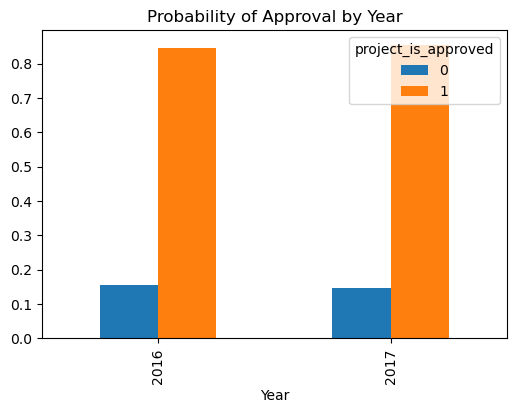

In [133]:
pd.crosstab(index=df_eda1['project_submitted_datetime'].dt.year, columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(6, 4))
time_var='Year'
plt.xlabel(f'{time_var}')
plt.title(f'Probability of Approval by {time_var}')
plt.show()

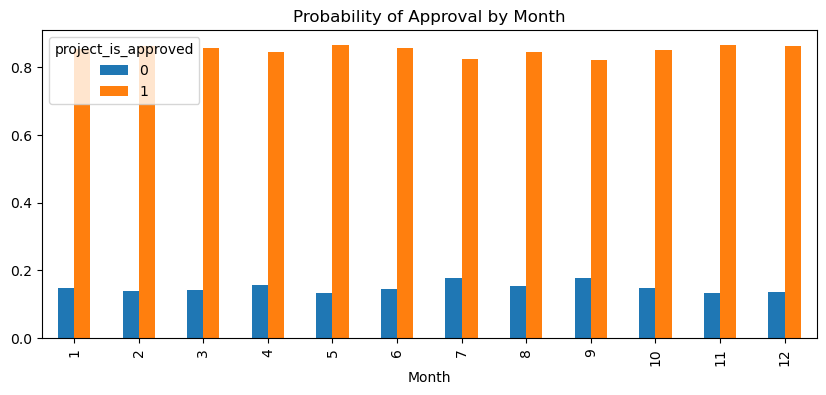

In [26]:
pd.crosstab(index=df_eda1['project_submitted_datetime'].dt.month, columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(10, 4))
time_var='Month'
plt.xlabel(f'{time_var}')
plt.title(f'Probability of Approval by {time_var}')
plt.show()

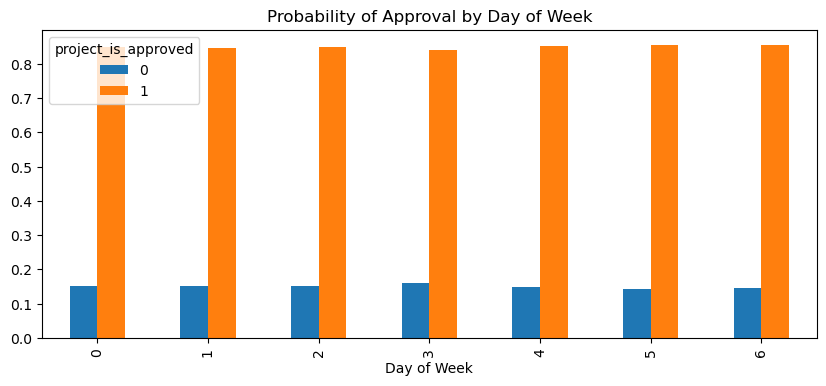

In [27]:
pd.crosstab(index=df_eda1['project_submitted_datetime'].dt.dayofweek, columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(10, 4))
time_var='Day of Week'
plt.xlabel(f'{time_var}')
plt.title(f'Probability of Approval by {time_var}')
plt.show()

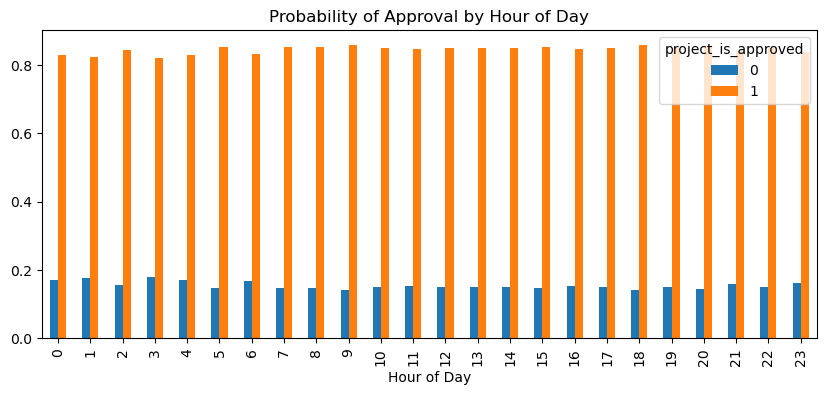

In [28]:
pd.crosstab(index=df_eda1['project_submitted_datetime'].dt.hour, columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(10, 4))
time_var='Hour of Day'
plt.xlabel(f'{time_var}')
plt.title(f'Probability of Approval by {time_var}')
plt.show()

In [29]:
df_eda1['sub_year'] = df_eda1['project_submitted_datetime'].dt.year
df_eda1['sub_month'] = df_eda1['project_submitted_datetime'].dt.month
df_eda1['sub_dow'] = df_eda1['project_submitted_datetime'].dt.dayofweek
df_eda1['sub_hour'] = df_eda1['project_submitted_datetime'].dt.hour

## **Location Related Features**
- 'school_state'

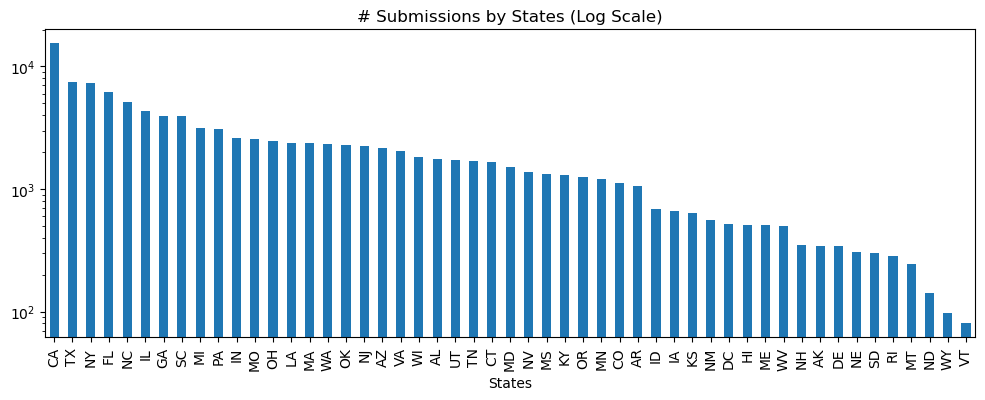

In [30]:
df_eda1['school_state'].value_counts().plot(kind="bar", figsize=(12, 4))
plt.yscale('log')
plt.xlabel('States')
plt.title('# Submissions by States (Log Scale)')
plt.show()

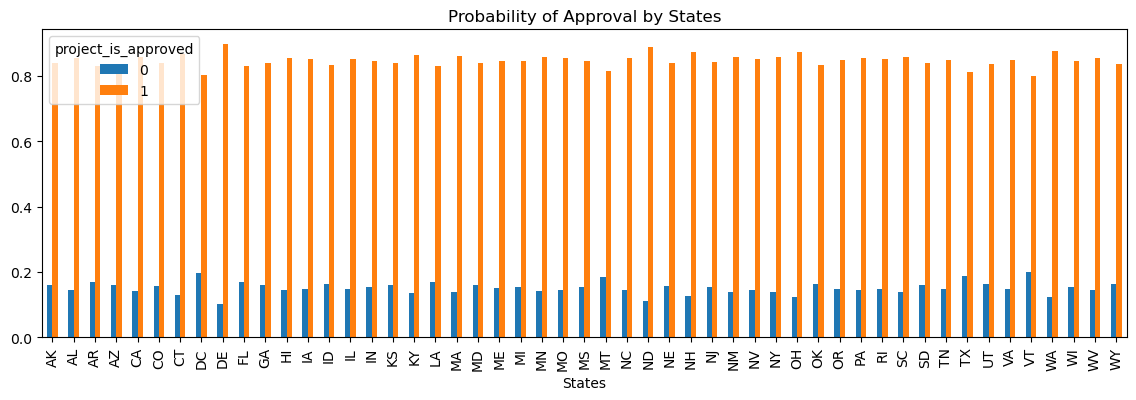

In [31]:
pd.crosstab(index=df_eda1['school_state'], columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind="bar", figsize=(14, 4))
plt.xlabel('States')
plt.title('Probability of Approval by States')
plt.show()

## **Teacher Related Features**
- 'teacher_id' 
- 'teacher_prefix'
- 'teacher_number_of_previously_posted_projects'

### **teacher_id**

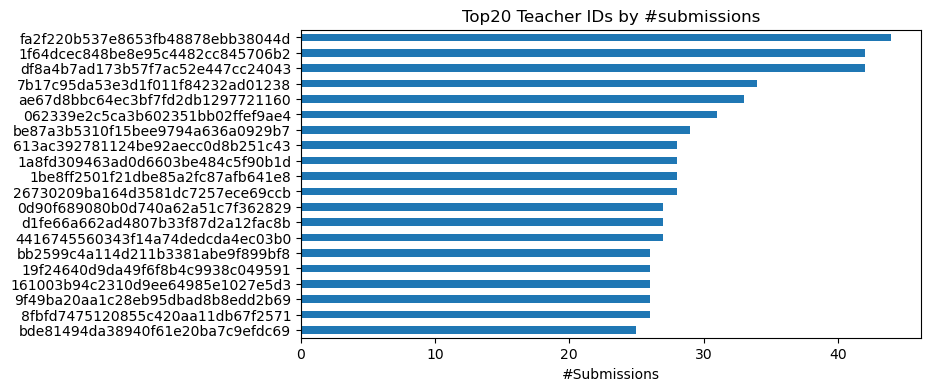

In [32]:
df_eda1['teacher_id'].value_counts()[:20][::-1].plot(kind="barh", figsize=(8, 4))
plt.xlabel('#Submissions')
plt.title('Top20 Teacher IDs by #submissions')
plt.show()

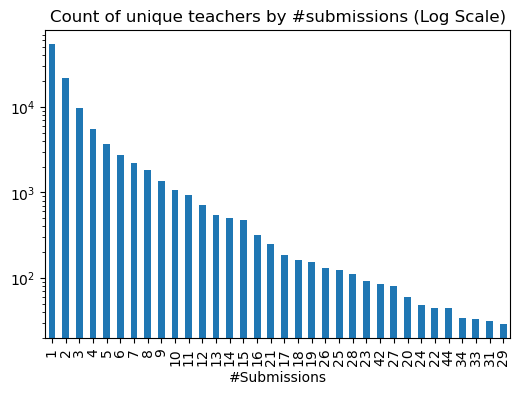

In [33]:
df_eda1['records_per_user'] = df_eda1.groupby(['teacher_id'])['id'].transform('count')
df_eda1['records_per_user'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.yscale('log')
plt.xlabel('#Submissions')
plt.title('Count of unique teachers by #submissions (Log Scale)')
plt.show()
plt.show()

We create a new feature which categories the teachers into 2 types: 
- those with only a single submission
- those with multiple submissions

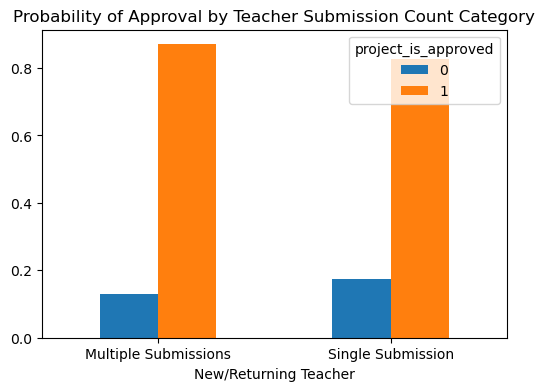

In [137]:
df_eda1['records_per_user_cat'] = df_eda1['records_per_user'].apply(lambda x: 'Single Submission' if x==1 else 'Multiple Submissions')
pd.crosstab(index=df_eda1['records_per_user_cat'], columns=df_eda1['project_is_approved'], 
           normalize='index').plot(kind='bar', figsize=(6, 4))
plt.xlabel('New/Returning Teacher')
plt.xticks(rotation=0)
plt.title('Probability of Approval by Teacher Submission Count Category')
plt.show()

In [35]:
df_eda1['records_per_user_cat'].value_counts()

Multiple Record    54819
Single Record      54426
Name: records_per_user_cat, dtype: int64

### **teacher_prefix**

In [36]:
df_eda1['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [37]:
# Since count of 'Dr.' is very less, imputing it with the most frequent prefix (Mrs.)
df_eda1.loc[df_eda1['teacher_prefix']=='Dr.', 'teacher_prefix'] = 'Mrs.'
df_eda1['teacher_prefix'].value_counts()

Mrs.       57282
Ms.        38955
Mr.        10648
Teacher     2360
Name: teacher_prefix, dtype: int64

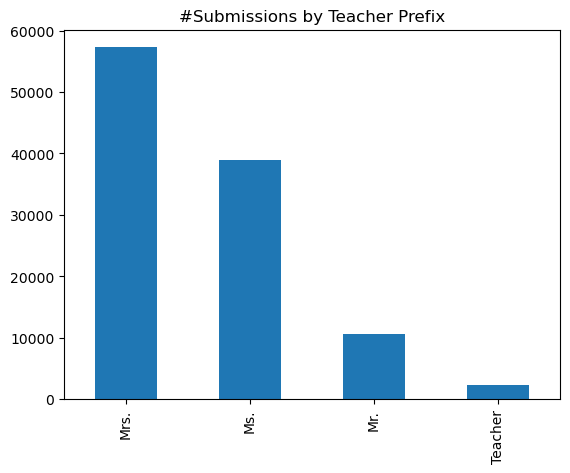

In [38]:
df_eda1['teacher_prefix'].value_counts().plot(kind='bar')
plt.title('#Submissions by Teacher Prefix')
plt.show()

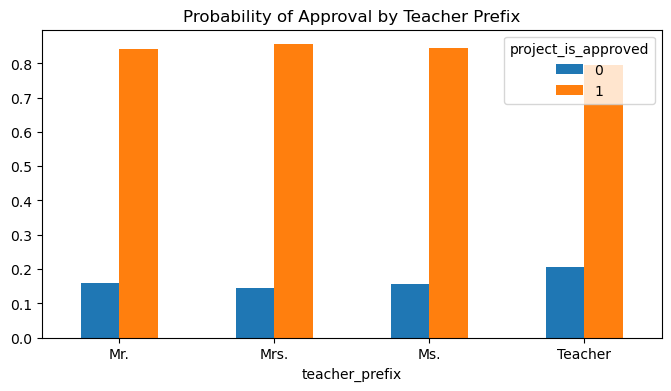

In [138]:
pd.crosstab(index=df_eda1['teacher_prefix'], columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind="bar", figsize=(8, 4))
plt.title('Probability of Approval by Teacher Prefix')
plt.xticks(rotation=0)
plt.show()

### **teacher_number_of_previously_posted_projects**

In [40]:
df_eda1['teacher_number_of_previously_posted_projects'].value_counts()

0      30012
1      16057
2      10350
3       7110
4       5266
       ...  
270        1
294        1
425        1
325        1
306        1
Name: teacher_number_of_previously_posted_projects, Length: 374, dtype: int64

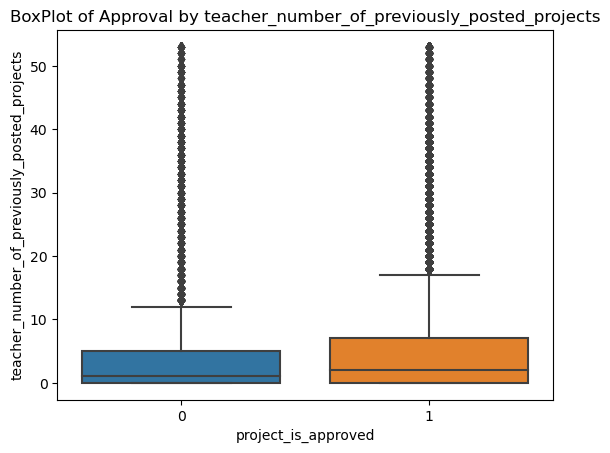

In [41]:
num_prev_proj=df_eda1['teacher_number_of_previously_posted_projects'].quantile(0.95)
sns.boxplot(y=df_eda1.loc[df_eda1['teacher_number_of_previously_posted_projects']<=num_prev_proj, 'teacher_number_of_previously_posted_projects'], 
            x=df_eda1['project_is_approved'])
plt.title('BoxPlot of Approval by teacher_number_of_previously_posted_projects')
plt.show()

## **Project Related Features**
- 'project_grade_category'
- 'project_subject_categories'
- 'project_subject_subcategories'

### **project_grade_category**

In [42]:
df_eda1['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37135
Grades 6-8       16923
Grades 9-12      10962
Name: project_grade_category, dtype: int64

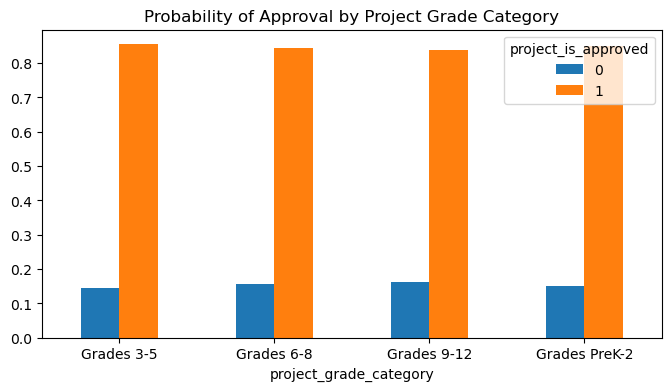

In [139]:
pd.crosstab(index=df_eda1['project_grade_category'], columns=df_eda1['project_is_approved'], 
            normalize='index').plot(kind="bar", figsize=(8, 4))
plt.title('Probability of Approval by Project Grade Category')
plt.xticks(rotation=0)
plt.show()

### **project_subject_categories**

In [44]:
psc_lst = []
for lst in df_eda1['project_subject_categories'].str.split(', ').values:
    psc_lst += lst 
psc_lst = set(psc_lst)
psc_lst

{'Applied Learning',
 'Care & Hunger',
 'Health & Sports',
 'History & Civics',
 'Literacy & Language',
 'Math & Science',
 'Music & The Arts',
 'Special Needs',
 'Warmth'}

In [45]:
df_psc = df_eda1[['id', 'project_subject_categories']].copy()
df_psc['psc'] = df_psc['project_subject_categories'].str.split(', ')
df_psc.head()

,id,project_subject_categories,psc
0,p253737,Literacy & Language,[Literacy & Language]
1,p258326,"History & Civics, Health & Sports","[History & Civics, Health & Sports]"
2,p182444,Health & Sports,[Health & Sports]
3,p246581,"Literacy & Language, Math & Science","[Literacy & Language, Math & Science]"
4,p104768,Math & Science,[Math & Science]


In [46]:
df_psc_explode = df_psc.explode('psc')
df_psc_explode.loc[df_psc_explode['id']=='p258326']

,id,project_subject_categories,psc
1,p258326,"History & Civics, Health & Sports",History & Civics
1,p258326,"History & Civics, Health & Sports",Health & Sports


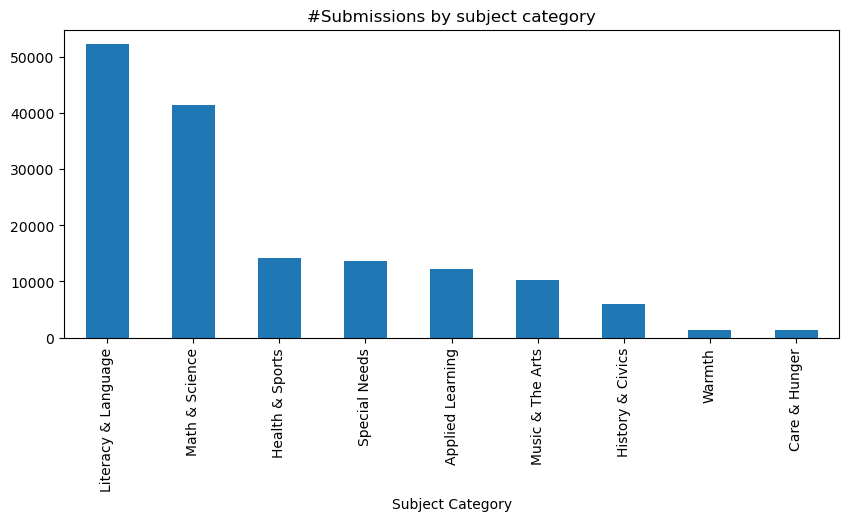

In [47]:
df_psc_explode['psc'].value_counts().plot(kind='bar', figsize=(10, 4))
plt.xlabel('Subject Category')
plt.title('#Submissions by subject category')
plt.show()

<Axes: xlabel='psc'>

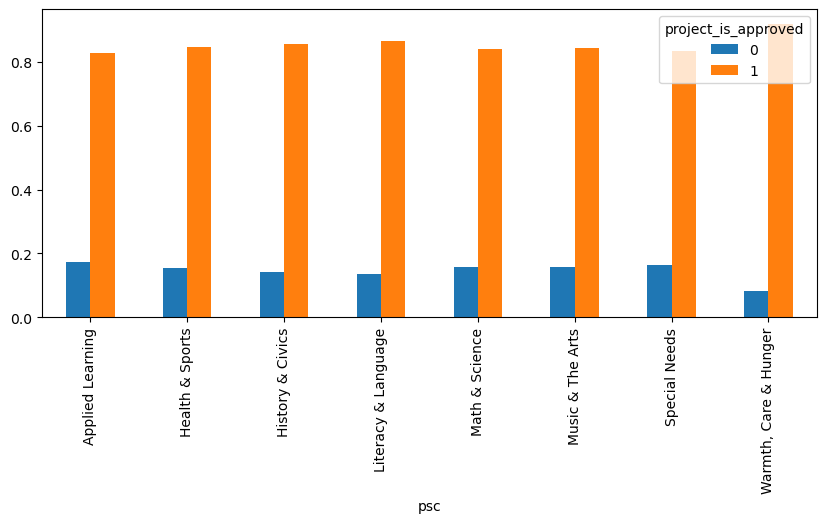

In [145]:
pd.crosstab(index=df_psc_explode2_cp['psc'], columns=df_psc_explode2_cp['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(10, 4))

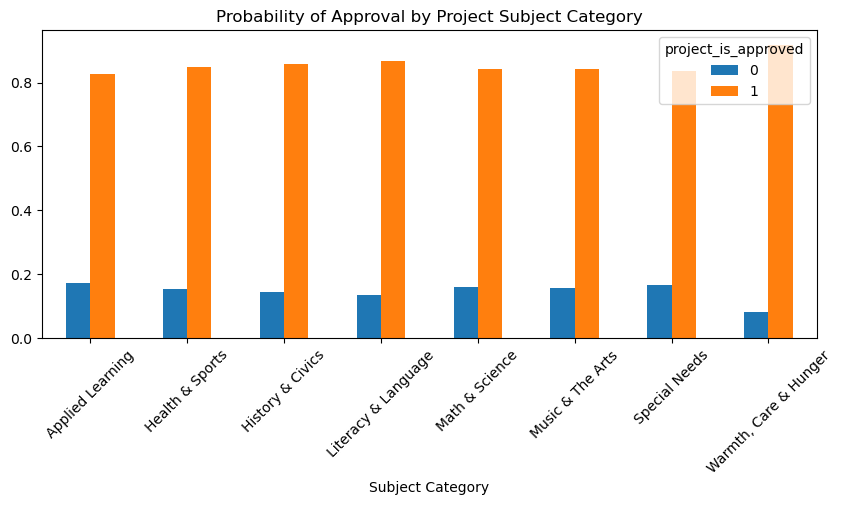

In [146]:
df_psc_explode2 = pd.merge(df_psc_explode, df_eda1[['id', 'project_is_approved']])
df_psc_explode2 = df_psc_explode2.loc[df_psc_explode2['psc']!='Warmth'].copy()
df_psc_explode2.replace({'Care & Hunger': 'Warmth, Care & Hunger'}, inplace=True)
pd.crosstab(index=df_psc_explode2['psc'], columns=df_psc_explode2['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(10, 4))
plt.xlabel('Subject Category')
plt.title('Probability of Approval by Project Subject Category')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Creating a df where project id is mapped to different subject categories
df_psc_clean = ~df_psc_explode.pivot(index='id', columns='psc').isna()
df_psc_clean = df_psc_clean.astype('int64')
df_psc_clean.columns = [tup[-1] for tup in df_psc_clean.columns]
df_psc_clean.drop('Warmth', axis=1, inplace=True)
df_psc_clean.rename(columns={'Care & Hunger':'Warmth, Care & Hunger'}, inplace=True)
# df_psc_clean.reset_index(inplace=True)
df_psc_clean.head()

,Applied Learning,"Warmth, Care & Hunger",Health & Sports,History & Civics,Literacy & Language,Math & Science,Music & The Arts,Special Needs
id,,,,,,,,
p000002,0,0,0,1,0,0,0,0
p000003,0,0,0,0,1,0,0,0
p000004,0,0,0,0,1,0,0,0
p000006,0,0,0,0,1,0,0,0
p000007,0,0,0,0,1,1,0,0


In [50]:
df_psc_clean.sum()

Applied Learning         12135
Warmth, Care & Hunger     1388
Health & Sports          14223
History & Civics          5914
Literacy & Language      52236
Math & Science           41419
Music & The Arts         10293
Special Needs            13642
dtype: int64

In [51]:
df_psc_explode['psc'].value_counts()

Literacy & Language    52236
Math & Science         41419
Health & Sports        14223
Special Needs          13642
Applied Learning       12135
Music & The Arts       10293
History & Civics        5914
Warmth                  1388
Care & Hunger           1388
Name: psc, dtype: int64

### **project_subject_subcategories**

In [52]:
pssc_lst = []
for lst in df_eda1['project_subject_subcategories'].str.split(', ').values:
    pssc_lst += lst 
pssc_lst = set(pssc_lst)
pssc_lst

{'Applied Sciences',
 'Care & Hunger',
 'Character Education',
 'Civics & Government',
 'College & Career Prep',
 'Community Service',
 'ESL',
 'Early Development',
 'Economics',
 'Environmental Science',
 'Extracurricular',
 'Financial Literacy',
 'Foreign Languages',
 'Gym & Fitness',
 'Health & Life Science',
 'Health & Wellness',
 'History & Geography',
 'Literacy',
 'Literature & Writing',
 'Mathematics',
 'Music',
 'Nutrition Education',
 'Other',
 'Parent Involvement',
 'Performing Arts',
 'Social Sciences',
 'Special Needs',
 'Team Sports',
 'Visual Arts',
 'Warmth'}

In [53]:
df_pssc = df_eda1[['id', 'project_subject_subcategories']].copy()
df_pssc['pssc'] = df_pssc['project_subject_subcategories'].str.split(', ')
df_pssc.head()

,id,project_subject_subcategories,pssc
0,p253737,"ESL, Literacy","[ESL, Literacy]"
1,p258326,"Civics & Government, Team Sports","[Civics & Government, Team Sports]"
2,p182444,"Health & Wellness, Team Sports","[Health & Wellness, Team Sports]"
3,p246581,"Literacy, Mathematics","[Literacy, Mathematics]"
4,p104768,Mathematics,[Mathematics]


In [54]:
df_pssc_explode = df_pssc.explode('pssc')
df_pssc_explode.loc[df_pssc_explode['id']=='p258326']

,id,project_subject_subcategories,pssc
1,p258326,"Civics & Government, Team Sports",Civics & Government
1,p258326,"Civics & Government, Team Sports",Team Sports


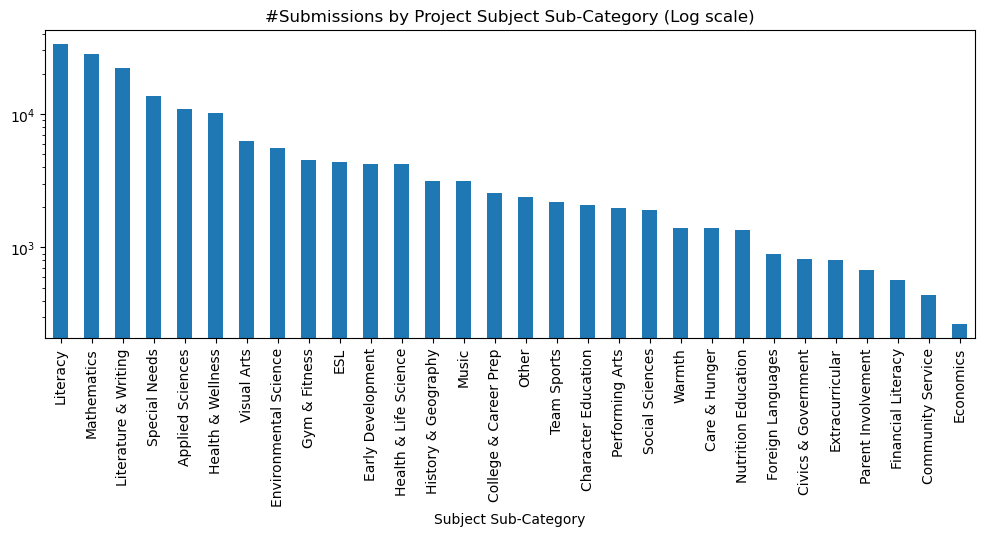

In [55]:
df_pssc_explode['pssc'].value_counts().plot(kind='bar', figsize=(12, 4))
plt.yscale('log')
plt.xlabel('Subject Sub-Category')
plt.title('#Submissions by Project Subject Sub-Category (Log scale)')
plt.show()

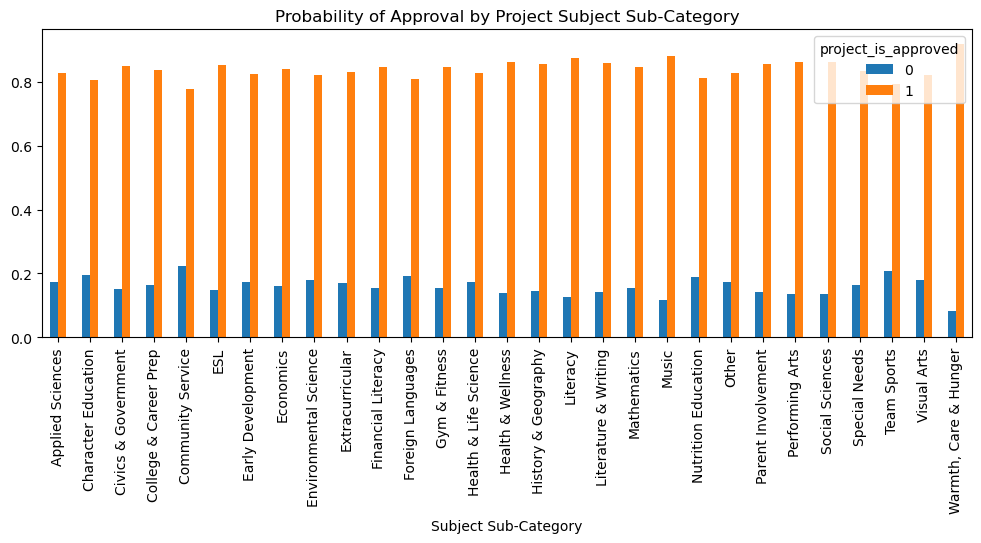

In [147]:
df_pssc_explode2 = pd.merge(df_pssc_explode, df_eda1[['id', 'project_is_approved']])
df_pssc_explode2 = df_pssc_explode2.loc[df_pssc_explode2['pssc']!='Warmth'].copy()
df_pssc_explode2.replace({'Care & Hunger': 'Warmth, Care & Hunger'}, inplace=True)
pd.crosstab(index=df_pssc_explode2['pssc'], columns=df_pssc_explode2['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(12, 4))
plt.xlabel('Subject Sub-Category')
plt.title('Probability of Approval by Project Subject Sub-Category')
plt.show()

In [57]:
# Creating a df where project id is mapped to different subject sub-categories
df_pssc_clean = ~df_pssc_explode.pivot(index='id', columns='pssc').isna()
df_pssc_clean = df_pssc_clean.astype('int64')
df_pssc_clean.columns = [tup[-1] for tup in df_pssc_clean.columns]
df_pssc_clean.drop('Warmth', axis=1, inplace=True)
df_pssc_clean.rename(columns={'Care & Hunger':'Warmth, Care & Hunger'}, inplace=True)
# df_pssc_clean.reset_index(inplace=True)
df_pssc_clean.head()

,Applied Sciences,"Warmth, Care & Hunger",Character Education,Civics & Government,College & Career Prep,Community Service,ESL,Early Development,Economics,Environmental Science,...,Mathematics,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs,Team Sports,Visual Arts
id,,,,,,,,,,,,,,,,,,,,,
p000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000007,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Resource Related Features**

In [58]:
df_res_eda1 = df_res.copy()
df_res_eda1.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


### **price**

In [59]:
df_res_eda1['price'].describe()

count    1.541272e+06
mean     5.028398e+01
std      1.447326e+02
min      0.000000e+00
25%      7.900000e+00
50%      1.499000e+01
75%      3.980000e+01
max      9.999000e+03
Name: price, dtype: float64

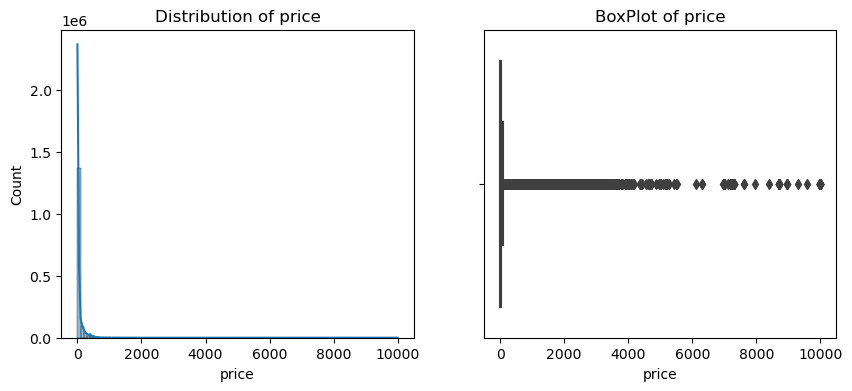

In [60]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_res_eda1['price'], bins=100, kde=True)
plt.title('Distribution of price')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_res_eda1['price'])
plt.title('BoxPlot of price')

plt.show()

Distribution of the 'price' feature is strongly right skewed
- We would want to apply log transformation on this variable
- However we would want to treat those rows with price<=1 before we apply the log transformation

In [61]:
# Checking the shape of the dataframe subset where price is b/w [0,1]
df_res_eda1.loc[(df_res_eda1['price']>=0) & (df_res_eda1['price']<=1)].shape

(11195, 4)

In [62]:
# Checking count of unique items where price is b/w [0,1]
df_res_eda1.loc[(df_res_eda1['price']>=0) & (df_res_eda1['price']<=1), 'description'].nunique()

1505

In [63]:
# Capping the price to 1 in all those rows where price is b/w [0, 1]
df_res_eda1.loc[(df_res_eda1['price']>=0) & (df_res_eda1['price']<=1), 'price'] = 1

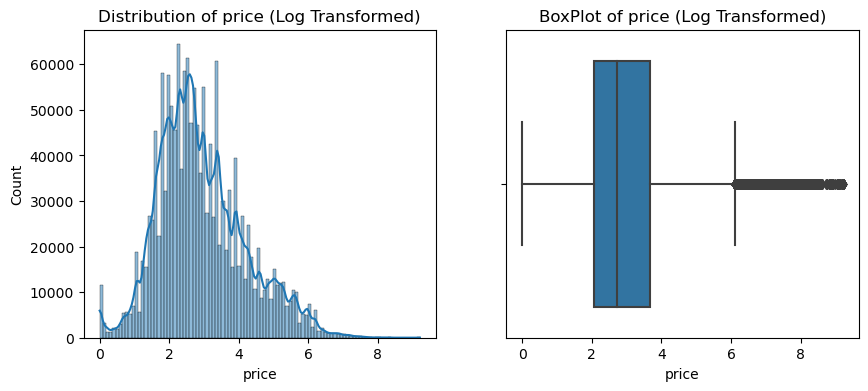

In [64]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(np.log(df_res_eda1['price']), bins=100, kde=True)
plt.title('Distribution of price (Log Transformed)')

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log(df_res_eda1['price']))
plt.title('BoxPlot of price (Log Transformed)')

plt.show()

In [65]:
# Creating log transformed vewrsion of price
df_res_eda1['item_price_log'] = np.log(df_res_eda1['price'])
df_res_eda1['item_price_log'].describe()

count    1.541272e+06
mean     2.937180e+00
std      1.258617e+00
min      0.000000e+00
25%      2.066863e+00
50%      2.707383e+00
75%      3.683867e+00
max      9.210240e+00
Name: item_price_log, dtype: float64

Creating 2 features:
- expensive_item_quantity: Identify those items whose price is above the upper whisker of a boxplot as expensive items
- total_item_price: quantity * price

In [66]:
# Tagging items with high price as expensive items
item_price_log_iqr = df_res_eda1['item_price_log'].quantile(0.75)-df_res_eda1['item_price_log'].quantile(0.25)
item_price_log_upp_whis = df_res_eda1['item_price_log'].quantile(0.75) + 1.5*item_price_log_iqr
df_res_eda1['expensive_item_quantity'] = df_res_eda1[['quantity', 'item_price_log']].apply(lambda x: x[0] if x[1]>item_price_log_upp_whis 
                                                                                           else 0, axis=1)
df_res_eda1['total_item_price'] = df_res_eda1['quantity']*df_res_eda1['price']

### **Handling missing values in description feature**

In [67]:
df_res_eda1.isna().sum()

id                           0
description                292
quantity                     0
price                        0
item_price_log               0
expensive_item_quantity      0
total_item_price             0
dtype: int64

In [68]:
# Finding the price of those rows where description is missing
miss_des_unique_price = df_res_eda1.loc[df_res_eda1['description'].isna(), 'price'].sort_values().unique()
miss_des_unique_price

array([  9.95,  11.69,  15.52,  20.69,  22.02,  22.16,  22.83,  23.63,
        24.31,  27.34,  28.84,  29.42,  33.12,  33.23,  33.89,  35.43,
        39.63,  44.36,  44.38,  46.55,  47.26,  60.61,  64.3 ,  73.16,
        77.66,  78.74,  94.75, 106.44, 110.78, 116.37, 119.75, 155.18,
       199.58, 212.88, 221.26, 221.78, 243.98])

Strategy for imputing missing values in description:
- For each price P in the above array, we want to find the most popular item description (let us call it X_P)
- We will impute the missing description for all the rows with price P with X_P

In [69]:
# Sample: Checking most frequent item with price=9.95
df_res_eda1.loc[df_res_eda1['price']==9.95, 'description'].mode()

0    Standard Shipping
Name: description, dtype: object

In [70]:
# Implementing the strategy for imputation in code: Creating a dictionary which stores the mapping b/w price and most frequent item
miss_des_dict = {}
for price in df_res_eda1.loc[df_res_eda1['description'].isna(), 'price'].sort_values().unique():
    if price!=221.26:
        mode_val = df_res_eda1.loc[df_res_eda1['price']==price, 'description'].mode()[0]
        miss_des_dict[price] = mode_val

In [71]:
# Length of array storing unique prices where description was missing
len(miss_des_unique_price)

37

In [72]:
# Length of array where match is found
len(miss_des_dict)

36

In [73]:
# We did not find a match for 1 value
print(set(miss_des_unique_price)-set(miss_des_dict))
print('-'*50)
print(df_res_eda1.loc[df_res_eda1['price']==221.26, 'description'].mode())
print('-'*50)
df_res_eda1.loc[df_res_eda1['price']==221.26]

{221.26}
--------------------------------------------------
Series([], Name: description, dtype: object)
--------------------------------------------------


,id,description,quantity,price,item_price_log,expensive_item_quantity,total_item_price
70780,p230008,NaN,1,221.26,5.399338,0.0,221.26


In [74]:
# Imputing with the description of the nearest price value
df_res_eda1.loc[df_res_eda1['price']==221, 'description'].mode()

0    Brinsea Products Mini II Advance Automatic 7 E...
1    Brother Business Smart MFCJ5720DW All-in-One C...
Name: description, dtype: object

In [75]:
miss_des_dict[221.26] = df_res_eda1.loc[df_res_eda1['price']==221, 'description'].mode()[0]
miss_des_dict

{9.95: 'Standard Shipping',
 11.69: 'Smead Hanging File Folders, 1/5-Cut Tab, Letter Size, 25 Per Box, Assorted Primary Colors (64059)',
 15.52: 'Miss Nelson (3 Bk Set)',
 20.69: 'Lunch Lady (4 Bk Set)',
 22.02: 'Pacon Classroom Keepers Construction Paper Storage for 12-inch by 18-inch Paper, 10 Slots (001316)',
 22.16: 'Winning Season (5 Bk Set)',
 22.83: '3-Pair 5A Sticks with Free Pair 5A Barrel Wood Tip',
 23.63: 'Neon Sport Water Bottles (1 dozen) - Bulk [Toy]',
 24.31: 'Binney & Smith Crayola Classpack Colored Pencils, 240 Pencils/Set, 12 Colors',
 27.34: 'Favorite Author Study - Eve Bunting (5 Bk Set)',
 28.84: 'Sterilite 20439002 Medium 3 Drawer Desktop Unit, Black with Clear Drawers, 2-Pack',
 29.42: 'LG GP60NB50 Super Multi - DVD�RW (�R DL) / DVD-RAM drive - USB 2.0',
 33.12: 'Canon - PGI-2200 XL High-Yield Ink Cartridge - Black',
 33.23: 'Stamina 15-0120 InStride Cycle XL',
 33.89: 'Time (5 Books)',
 35.43: 'Funny Bone Readers en español (12 Bk Set) Spanish',
 39.63: "DigiLa

In [76]:
# Imputing the missing values in description feature
df_res_eda1['description'] = df_res_eda1[['description', 'price']].apply(lambda x: miss_des_dict[x[1]] if pd.isna(x[0]) 
                                                                         else x[0], axis=1)

In [77]:
df_res_eda1.isna().sum()

id                         0
description                0
quantity                   0
price                      0
item_price_log             0
expensive_item_quantity    0
total_item_price           0
dtype: int64

### **Creating features post Aggregation**
- A single project can have multiple items listed
- We want to aggregate at project_id level and create a few features

In [78]:
df_res_agg = df_res_eda1.groupby('id')[['quantity', 
                                        'expensive_item_quantity',
                                        'description',
                                        'total_item_price']].agg({'quantity':['sum'], 
                                                                  'expensive_item_quantity':['sum'],
                                                                  'description':['nunique'],
                                                                  'total_item_price' : ['sum']
                                                                })

df_res_agg.columns = [('_').join(tup) for tup in df_res_agg.columns]
df_res_agg.reset_index(inplace=True)
df_res_agg.rename(columns={'quantity_sum':'res_item_q', 
                                'expensive_item_quantity_sum': 'res_exp_item_q',
                                'description_nunique': 'res_item_uniq',
                                'total_item_price_sum': 'res_price'
                               }, inplace=True)
df_res_agg.head()

,id,res_item_q,res_exp_item_q,res_item_uniq,res_price
0,p000001,7,0.0,4,833.63
1,p000002,21,0.0,14,630.28
2,p000003,4,0.0,4,298.97
3,p000004,98,0.0,93,1126.22
4,p000005,8,0.0,2,702.31


In [79]:
# Merging the target variable with df_res_agg
df_res_agg2 = pd.merge(df_eda1[['id', 'project_is_approved']], df_res_agg, how='left')
df_res_agg2

,id,project_is_approved,res_item_q,res_exp_item_q,res_item_uniq,res_price
0,p253737,0,23,0.0,7,596.36
1,p258326,1,1,0.0,1,299.00
2,p182444,0,22,0.0,12,686.68
3,p246581,1,4,0.0,3,431.90
4,p104768,1,4,0.0,2,143.96
...,...,...,...,...,...,...
109240,p048540,1,8,0.0,2,239.92
109241,p166281,1,4,0.0,3,846.32
109242,p155633,1,4,0.0,4,239.96
109243,p206114,1,16,0.0,4,231.74


In [80]:
# Descriptive Statistics of df_res_agg2
df_res_agg2.describe()

,project_is_approved,res_item_q,res_exp_item_q,res_item_uniq,res_price
count,109245.000000,109245.000000,109245.000000,109245.000000,109245.000000
mean,0.848579,16.965893,0.088581,5.874374,545.779543
std,0.358461,26.183223,0.362177,8.267817,546.891700
min,0.000000,1.000000,0.000000,1.000000,100.000000
25%,1.000000,4.000000,0.000000,1.000000,246.090000
50%,1.000000,9.000000,0.000000,3.000000,397.200000
75%,1.000000,21.000000,0.000000,7.000000,691.940000
max,1.000000,930.000000,20.000000,100.000000,13543.820000


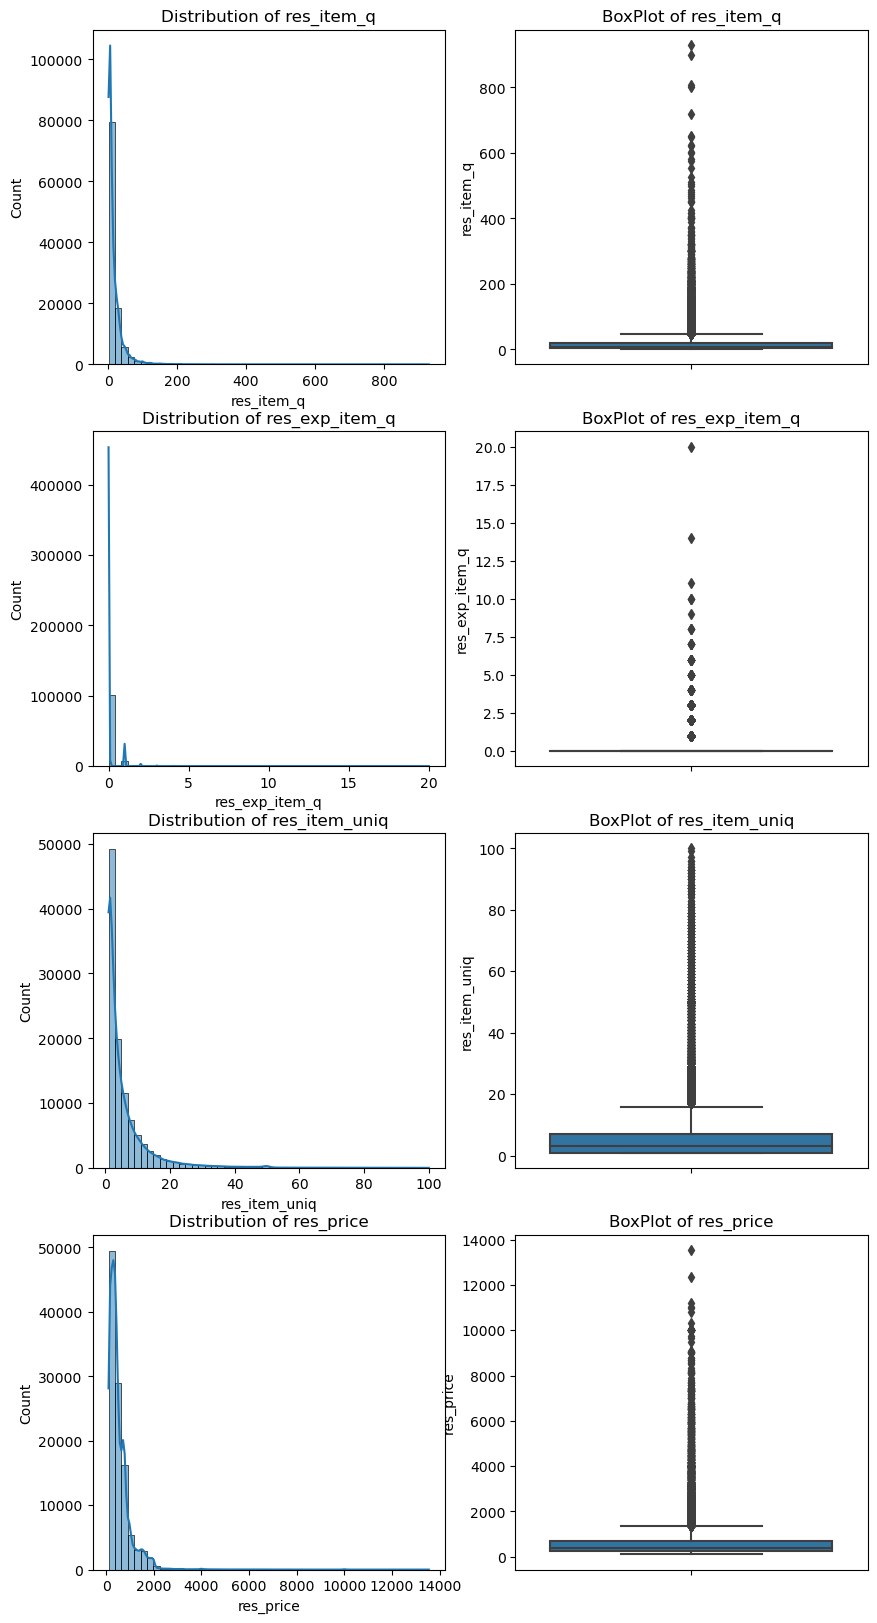

In [81]:
plt.figure(figsize=(10, 20))

i = 1
for col in df_res_agg2.columns[2:6]:

    plt.subplot(4, 2, i)
    sns.histplot(df_res_agg2[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(4, 2, i+1)
    sns.boxplot(y=df_res_agg2[col])
    plt.title(f'BoxPlot of {col}')
    
    i += 2

plt.show()

In [82]:
# Binning res_exp_item_q
df_res_agg3 = df_res_agg2.copy()
df_res_agg3['res_exp_item_qcat'] = pd.cut(df_res_agg2['res_exp_item_q'], bins=[0, 1, 4, 100], 
                                          labels=['Zero', 'Upto3', 'Above3'], right=False)
df_res_agg3['res_exp_item_qcat'].value_counts()

Zero      101098
Upto3       8054
Above3        93
Name: res_exp_item_qcat, dtype: int64

In [83]:
# Applying log transformation on res_item_q, res_item_uniq, res_price
df_res_agg3['res_item_q_ln'] = np.log(df_res_agg3['res_item_q'])
df_res_agg3['res_item_uniq_ln'] = np.log(df_res_agg3['res_item_uniq'])
df_res_agg3['res_price_ln'] = np.log(df_res_agg3['res_price'])

In [84]:
df_res_agg3.head()

,id,project_is_approved,res_item_q,res_exp_item_q,res_item_uniq,res_price,res_exp_item_qcat,res_item_q_ln,res_item_uniq_ln,res_price_ln
0,p253737,0,23,0.0,7,596.36,Zero,3.135494,1.945910,6.390845
1,p258326,1,1,0.0,1,299.00,Zero,0.000000,0.000000,5.700444
2,p182444,0,22,0.0,12,686.68,Zero,3.091042,2.484907,6.531868
3,p246581,1,4,0.0,3,431.90,Zero,1.386294,1.098612,6.068194
4,p104768,1,4,0.0,2,143.96,Zero,1.386294,0.693147,4.969535


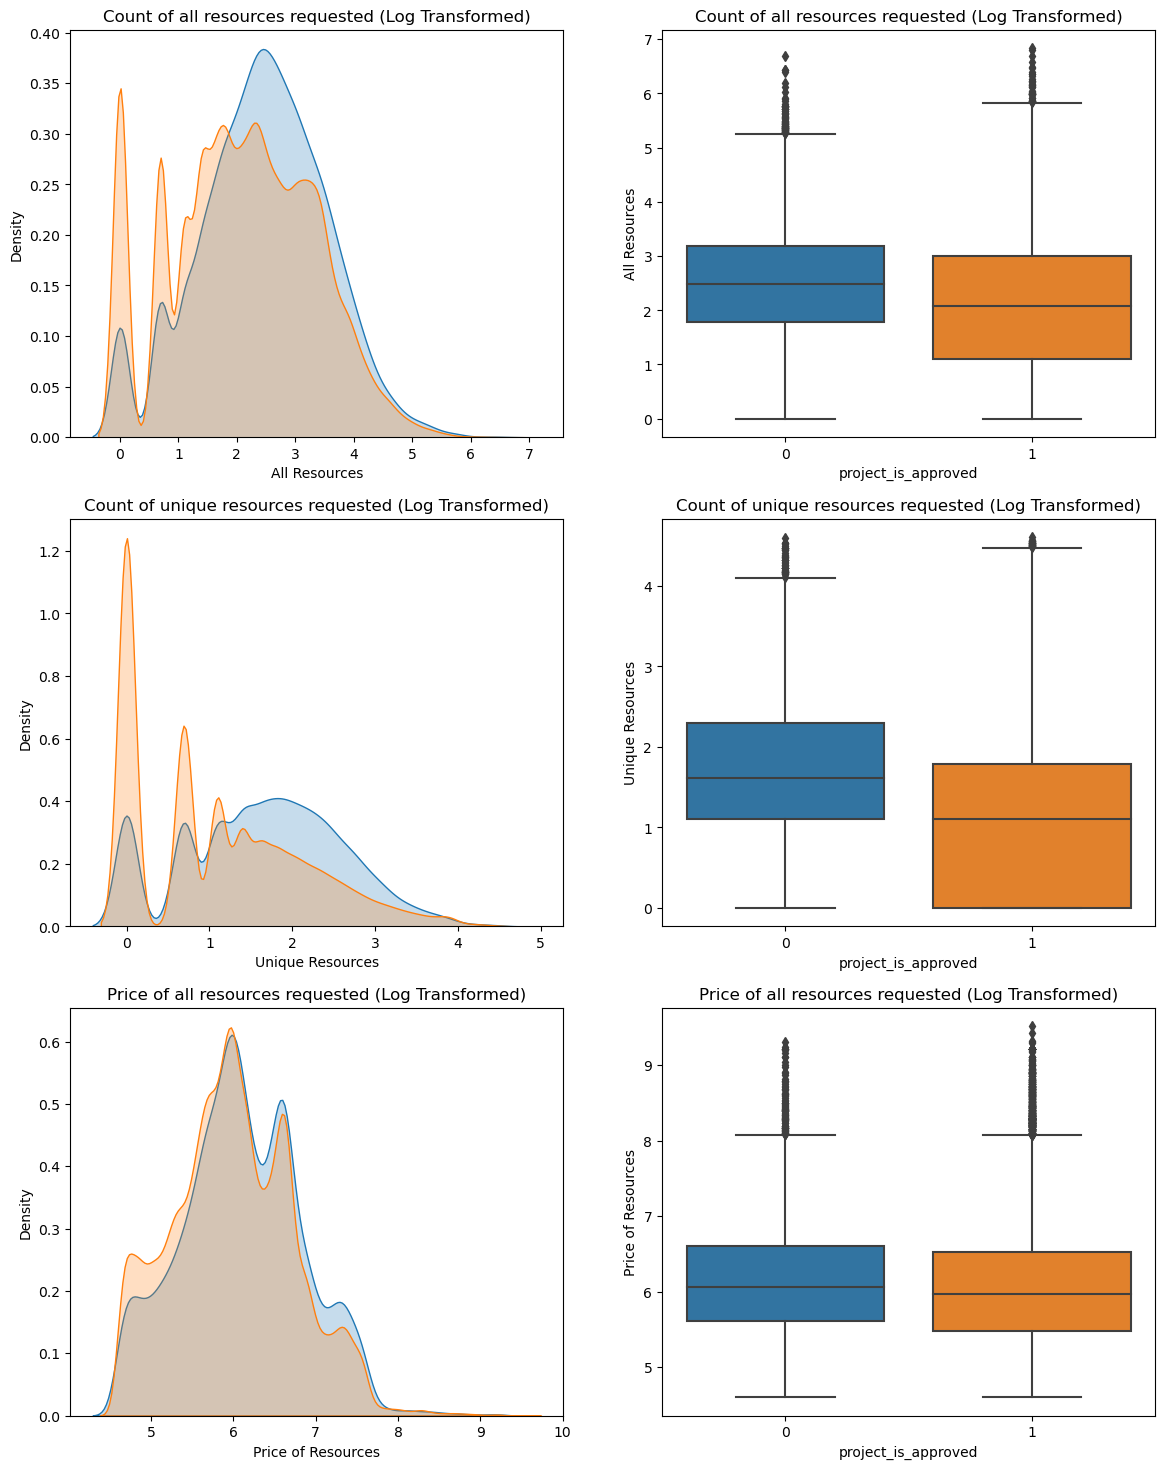

In [173]:
plt.figure(figsize=(14, 18))

i = 1
for col in ['res_item_q_ln', 'res_item_uniq_ln', 'res_price_ln']:
    plt.subplot(3, 2, i)
    # sns.histplot(data=df_res_agg3, x=col, bins=50, kde=True, hue='project_is_approved')
    sns.kdeplot(df_res_agg3.loc[df_res_agg3['project_is_approved']==0, col], fill=True)
    sns.kdeplot(df_res_agg3.loc[df_res_agg3['project_is_approved']==1, col], fill=True)
    # plt.title(f'Distribution of {col}')
    if col=='res_item_q_ln':
        plt.title(f'Count of all resources requested (Log Transformed)')
        plt.xlabel('All Resources')
    elif col=='res_item_uniq_ln':
        plt.title(f'Count of unique resources requested (Log Transformed)')
        plt.xlabel('Unique Resources')
    else:
        plt.title(f'Price of all resources requested (Log Transformed)')
        plt.xlabel('Price of Resources')
        
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df_res_agg3, y=col, x='project_is_approved')
    # plt.title(f'BoxPlot of {col}')
    if col=='res_item_q_ln':
        plt.title(f'Count of all resources requested (Log Transformed)')
        plt.ylabel('All Resources')
    elif col=='res_item_uniq_ln':
        plt.title(f'Count of unique resources requested (Log Transformed)')
        plt.ylabel('Unique Resources')
    else:
        plt.title(f'Price of all resources requested (Log Transformed)')
        plt.ylabel('Price of Resources')
    

    i += 2
    
plt.show()

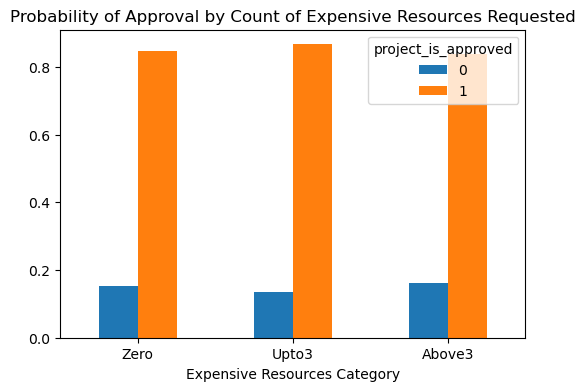

In [169]:
pd.crosstab(index=df_res_agg3['res_exp_item_qcat'], columns=df_res_agg3['project_is_approved'], 
            normalize='index').plot(kind='bar', figsize=(6, 4))
plt.title('Probability of Approval by Count of Expensive Resources Requested')
plt.xticks(rotation=0)
plt.xlabel('Expensive Resources Category')
plt.show()

In [87]:
# Cleaning up the aggregated df_res_agg3
df_resource_clean = df_res_agg3[['id', 'res_item_q_ln', 'res_item_uniq_ln', 'res_exp_item_qcat', 'res_price_ln']].copy()
df_resource_clean.head()

,id,res_item_q_ln,res_item_uniq_ln,res_exp_item_qcat,res_price_ln
0,p253737,3.135494,1.945910,Zero,6.390845
1,p258326,0.000000,0.000000,Zero,5.700444
2,p182444,3.091042,2.484907,Zero,6.531868
3,p246581,1.386294,1.098612,Zero,6.068194
4,p104768,1.386294,0.693147,Zero,4.969535


# **Merging all the base dataframes created till now**

In [88]:
df_eda1.head(3)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,dos,sub_year,sub_month,sub_dow,sub_hour,records_per_user,records_per_user_cat
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,...,My students need opportunities to practice beg...,0,0,2016-12-05,2016,12,0,13,1,Single Record
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,...,My students need a projector to help with view...,7,1,2016-10-25,2016,10,1,9,4,Multiple Record
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",...,"My students need shine guards, athletic socks,...",1,0,2016-08-31,2016,8,2,12,3,Multiple Record


In [89]:
df_psc_clean.head(3)

,Applied Learning,"Warmth, Care & Hunger",Health & Sports,History & Civics,Literacy & Language,Math & Science,Music & The Arts,Special Needs
id,,,,,,,,
p000002,0,0,0,1,0,0,0,0
p000003,0,0,0,0,1,0,0,0
p000004,0,0,0,0,1,0,0,0


In [90]:
df_pssc_clean.head(3)

,Applied Sciences,"Warmth, Care & Hunger",Character Education,Civics & Government,College & Career Prep,Community Service,ESL,Early Development,Economics,Environmental Science,...,Mathematics,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs,Team Sports,Visual Arts
id,,,,,,,,,,,,,,,,,,,,,
p000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_resource_clean.head(3)

,id,res_item_q_ln,res_item_uniq_ln,res_exp_item_qcat,res_price_ln
0,p253737,3.135494,1.945910,Zero,6.390845
1,p258326,0.000000,0.000000,Zero,5.700444
2,p182444,3.091042,2.484907,Zero,6.531868


In [92]:
print(df_eda1.shape)
print(df_psc_clean.shape)
print(df_pssc_clean.shape)
print(df_resource_clean.shape)

(109245, 23)
(109245, 8)
(109245, 29)
(109245, 5)


In [93]:
df_int1 = pd.merge(df_eda1.drop(['teacher_id', 
                                 'project_submitted_datetime', 'project_subject_categories', 'project_subject_subcategories', 
                                 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 
                                 'project_resource_summary'], axis=1), 
                   df_resource_clean, on='id', how='left')

df_int2 = pd.merge(df_psc_clean, df_pssc_clean, left_index=True, right_index=True, how='left').reset_index()

df_clean1 = pd.merge(df_int1, df_int2, on='id', how='left')

df_clean1['dos'] = pd.to_datetime(df_clean1['dos'])
df_clean1['sub_year'] = df_clean1['sub_year'].astype('str')
df_clean1['sub_month'] = df_clean1['sub_month'].astype('str')
df_clean1['sub_dow'] = df_clean1['sub_dow'].astype('str')
df_clean1['sub_hour'] = df_clean1['sub_hour'].astype('str')
df_clean1['res_exp_item_qcat'] = df_clean1['res_exp_item_qcat'].astype('str')
df_clean1.head()

,id,teacher_prefix,school_state,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,dos,sub_year,sub_month,sub_dow,...,Mathematics,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs_y,Team Sports,Visual Arts
0,p253737,Mrs.,IN,Grades PreK-2,0,0,2016-12-05,2016,12,0,...,0,0,0,0,0,0,0,0,0,0
1,p258326,Mr.,FL,Grades 6-8,7,1,2016-10-25,2016,10,1,...,0,0,0,0,0,0,0,0,1,0
2,p182444,Ms.,AZ,Grades 6-8,1,0,2016-08-31,2016,8,2,...,0,0,0,0,0,0,0,0,1,0
3,p246581,Mrs.,KY,Grades PreK-2,4,1,2016-10-06,2016,10,3,...,1,0,0,0,0,0,0,0,0,0
4,p104768,Mrs.,TX,Grades PreK-2,1,1,2016-07-11,2016,7,0,...,1,0,0,0,0,0,0,0,0,0


In [94]:
df_clean1.shape

(109245, 54)

In [95]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109245 entries, 0 to 109244
Data columns (total 54 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   id                                            109245 non-null  object        
 1   teacher_prefix                                109245 non-null  object        
 2   school_state                                  109245 non-null  object        
 3   project_grade_category                        109245 non-null  object        
 4   teacher_number_of_previously_posted_projects  109245 non-null  int64         
 5   project_is_approved                           109245 non-null  int64         
 6   dos                                           109245 non-null  datetime64[ns]
 7   sub_year                                      109245 non-null  object        
 8   sub_month                                     109245 n

In [96]:
# Identifying redundant columns
print(df_clean1[['Warmth, Care & Hunger_x', 'Warmth, Care & Hunger_y']].apply(lambda x: x[0]!=x[1], axis=1).sum())
print(df_clean1[['Special Needs_x', 'Special Needs_y']].apply(lambda x: x[0]!=x[1], axis=1).sum())

0
0


In [97]:
df_clean1.drop(['Warmth, Care & Hunger_y', 'Special Needs_y'], axis=1, inplace=True)
df_clean1.rename({'Warmth, Care & Hunger_x':'Warmth, Care & Hunger', 'Special Needs_x':'Special Needs'}, axis=1, inplace=True)
df_clean1.shape

(109245, 52)

In [98]:
df_clean1_num_cols = []
df_clean1_cat_cols = []

for col in df_clean1.columns[1:]:
    if col != 'project_is_approved':
        if df_clean1[col].dtype=='object':
            df_clean1_cat_cols.append(col)
        elif df_clean1[col].dtype=='int' or df_clean1[col].dtype=='float':
            df_clean1_num_cols.append(col)

In [99]:
len(df_clean1_cat_cols)

9

In [100]:
len(df_clean1_num_cols)

40

# **Compiling and Saving Datasets**

In [101]:
# df_eda1.to_csv(path_or_buf='./data/non_nlp_features/df_eda1.csv', sep=',', index=False)
# df_psc_clean.to_csv(path_or_buf='./data/non_nlp_features/df_psc_clean.csv', sep=',', index=False)
# df_pssc_clean.to_csv(path_or_buf='./data/non_nlp_features/df_pssc_clean.csv', sep=',', index=False)
# df_resource_clean.to_csv(path_or_buf='./data/non_nlp_features/df_resource_clean.csv', sep=',', index=False)
# df_clean1.to_csv(path_or_buf='./data/non_nlp_features/df_non_nlp_feats1.csv', sep=',', index=False)

# **Hypothesis Testing**

## **Categorical Columns**

In [102]:
hypotst_cat_cols_dict = {'feature':[], 'chi_stat':[], 'p_value':[], 'reject_H0':[]}

for col in df_clean1_cat_cols:
    df_con_table = pd.crosstab(index=df_clean1[col], columns=df_clean1['project_is_approved'])
    chi_stat, p_value, dof, expected = chi2_contingency(df_con_table)
    
    # print(df_con_table)
    # print('chi_stat:', chi_stat, 'p_value:', p_value)
    
    hypotst_cat_cols_dict['feature'].append(col)
    hypotst_cat_cols_dict['chi_stat'].append(round(chi_stat, 2))
    hypotst_cat_cols_dict['p_value'].append(round(p_value, 2))
    hypotst_cat_cols_dict['reject_H0'].append('Reject' if p_value<0.05 else 'Fal to reject')
    
    # print('-'*50)

In [103]:
hypotst_cat_cols_df = pd.DataFrame(hypotst_cat_cols_dict)
hypotst_cat_cols_df

,feature,chi_stat,p_value,reject_H0
0,teacher_prefix,85.44,0.0,Reject
1,school_state,196.14,0.0,Reject
2,project_grade_category,24.78,0.0,Reject
3,sub_year,11.12,0.0,Reject
4,sub_month,185.05,0.0,Reject
5,sub_dow,19.39,0.0,Reject
6,sub_hour,48.31,0.0,Reject
7,records_per_user_cat,400.32,0.0,Reject
8,res_exp_item_qcat,21.55,0.0,Reject


In [181]:
hypotst_cat_cols_filt_df = hypotst_cat_cols_df.loc[hypotst_cat_cols_df['feature'].isin(['teacher_prefix', 'school_state', 'project_grade_category', 'res_exp_item_qcat'])].copy()
hypotst_cat_cols_filt_df

,feature,chi_stat,p_value,reject_H0
0,teacher_prefix,85.44,0.0,Reject
1,school_state,196.14,0.0,Reject
2,project_grade_category,24.78,0.0,Reject
8,res_exp_item_qcat,21.55,0.0,Reject


In [182]:
hypotst_cat_cols_filt_df.rename({'res_exp_item_qcat': 'count_of_expensive_resources_category'})

,feature,chi_stat,p_value,reject_H0
0,teacher_prefix,85.44,0.0,Reject
1,school_state,196.14,0.0,Reject
2,project_grade_category,24.78,0.0,Reject
8,res_exp_item_qcat,21.55,0.0,Reject


## **Numerical Columns**

In [104]:
# Array lengths for the 2 classes (sample length>=30)
df_clean1['project_is_approved'].value_counts()

1    92703
0    16542
Name: project_is_approved, dtype: int64

In [105]:
hypotst_num_cols_dict = {'feature':[], 'Mean_0':[], 'Mean_1':[], 't_stat':[], 'p_value':[], 'reject_H0':[]}
for col in df_clean1_num_cols:

    arr_0 = df_clean1.loc[df_clean1['project_is_approved']==0, col]
    arr_1 = df_clean1.loc[df_clean1['project_is_approved']==1, col]
    t_stat, p_value = ttest_ind(arr_0, arr_1)
    
    # print(f'Mean of feature "{col}", approved=0: {arr_0.mean()}')
    # print(f'Mean of feature "{col}", approved=1: {arr_1.mean()}')
    # print('t_stat:', round(t_stat,2), 'p_value:', round(p_value,2))
    
    hypotst_num_cols_dict['feature'].append(col)
    hypotst_num_cols_dict['Mean_0'].append(round(arr_0.mean(), 2))
    hypotst_num_cols_dict['Mean_1'].append(round(arr_1.mean(), 2))
    hypotst_num_cols_dict['t_stat'].append(round(t_stat, 2))
    hypotst_num_cols_dict['p_value'].append(round(p_value, 2))
    hypotst_num_cols_dict['reject_H0'].append('Reject' if p_value<0.05 else 'Fal to reject')
    # print('-'*100)

In [106]:
hypotst_num_cols_df = pd.DataFrame(hypotst_num_cols_dict)
hypotst_num_cols_df

,feature,Mean_0,Mean_1,t_stat,p_value,reject_H0
0,teacher_number_of_previously_posted_projects,6.89,11.91,-21.48,0.00,Reject
1,records_per_user,2.31,3.07,-23.02,0.00,Reject
2,res_item_q_ln,2.43,2.08,34.42,0.00,Reject
3,res_item_uniq_ln,1.64,1.10,63.46,0.00,Reject
4,res_price_ln,6.10,5.99,16.89,0.00,Reject
5,Applied Learning,0.13,0.11,6.86,0.00,Reject
6,"Warmth, Care & Hunger",0.01,0.01,-7.25,0.00,Reject
7,Health & Sports,0.13,0.13,0.54,0.59,Fal to reject
8,History & Civics,0.05,0.05,-1.81,0.07,Fal to reject
9,Literacy & Language,0.42,0.49,-15.28,0.00,Reject


In [177]:
hypotst_num_cols_filt_df = hypotst_num_cols_df.loc[hypotst_num_cols_df['feature'].isin(['records_per_user', 'res_item_uniq_ln', 'res_item_q_ln', 'res_price_ln'])].copy()
hypotst_num_cols_filt_df

,feature,Mean_0,Mean_1,t_stat,p_value,reject_H0
1,records_per_user,2.31,3.07,-23.02,0.0,Reject
2,res_item_q_ln,2.43,2.08,34.42,0.0,Reject
3,res_item_uniq_ln,1.64,1.10,63.46,0.0,Reject
4,res_price_ln,6.10,5.99,16.89,0.0,Reject


In [179]:
hypotst_num_cols_filt_df.replace({'records_per_user':'records_per_teacher', 'res_item_uniq_ln':'count_of_unique_resources_ln', 
                                  'res_item_q_ln': 'count_of_all_resources_ln', 'res_price_ln': 'price_of_all_resources_ln'})

,feature,Mean_0,Mean_1,t_stat,p_value,reject_H0
1,records_per_teacher,2.31,3.07,-23.02,0.0,Reject
2,count_of_all_resources_ln,2.43,2.08,34.42,0.0,Reject
3,count_of_unique_resources_ln,1.64,1.10,63.46,0.0,Reject
4,price_of_all_resources_ln,6.10,5.99,16.89,0.0,Reject
